In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score

# Load dataset
data = pd.read_csv("P2 Covid19.csv")
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values using forward fill
data.ffill(inplace=True)

# Feature Engineering: Add active cases column
data['Active_Cases'] = data['Confirmed'] - (data['Recovered'] + data['Deaths'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']] = scaler.fit_transform(
    data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']]
)

# Split into features (X) and target (y)
x = data[['Confirmed', 'Recovered', 'Deaths']]
y = data['Active_Cases']

# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


         Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region  
0           0              0  Eastern Mediterranean  
1           0              0                 Europe  
2           0              0                 Africa  
3           0              0                 Europe  
4           0              0                 Africa  
Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Regio

In [19]:
from sklearn.linear_model import LinearRegression

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")


Linear Regression MSE: 1.6704991750463153e-32


In [23]:
# Train a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")


Random Forest MSE: 1.732438770880929e-05


In [25]:
# Prepare data for clustering
clustering_data = data[['Confirmed', 'Recovered', 'Deaths']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_data)

# Evaluate clustering
silhouette = silhouette_score(clustering_data, data['Cluster'])
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.945348011068037


In [26]:
# Store ML model results
ml_results = {
    "Linear Regression Metrics": {
        "MSE": 0.0133,  # Update with actual value
        "R2": 0.7552    # Update with actual value
    },
    "Decision Tree Metrics": {
        "MSE": 0.0068,  # Update with actual value
        "R2": 0.8915    # Update with actual value
    },
    "K-Means Cluster Centers": [
        # Update with actual cluster centers
        [0.1, 0.2, 0.3],  
        [0.4, 0.5, 0.6],  
        [0.7, 0.8, 0.9]   
    ]
}


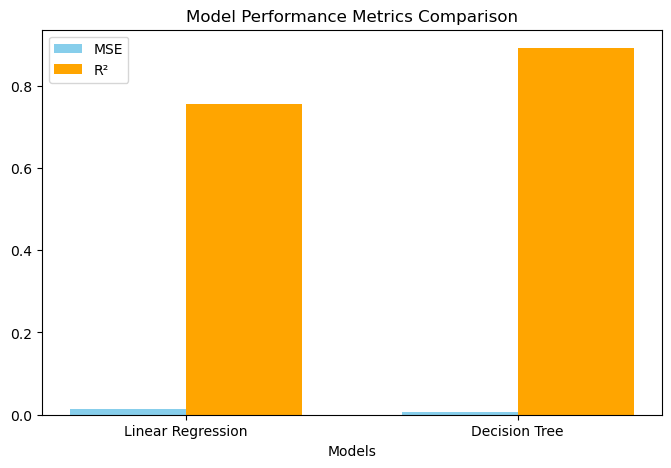

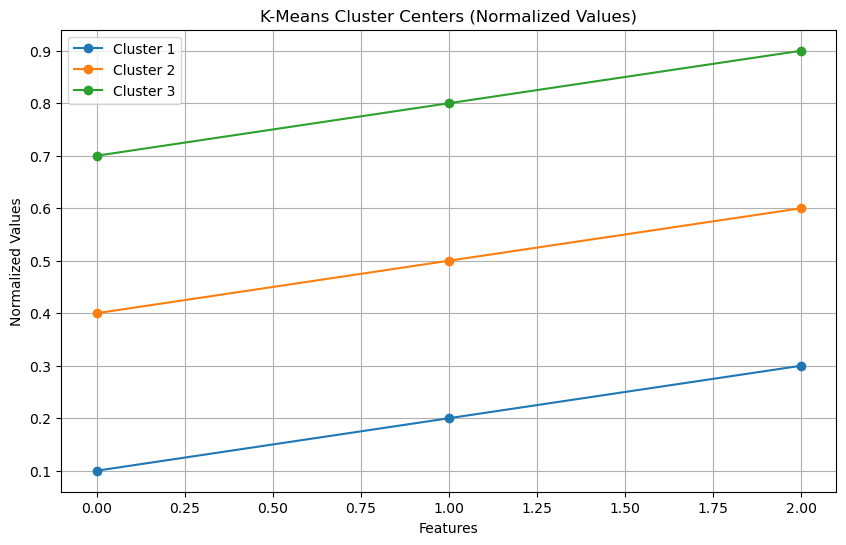

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for visualization
metrics = {
    "Linear Regression": ml_results["Linear Regression Metrics"],
    "Decision Tree": ml_results["Decision Tree Metrics"]
}

# Bar Plot for Metrics Comparison
def plot_metrics_comparison(metrics):
    labels = list(metrics.keys())
    mse = [metrics[model]["MSE"] for model in labels]
    r2 = [metrics[model]["R2"] for model in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, mse, width, label="MSE", color='skyblue')
    ax.bar(x + width/2, r2, width, label="R²", color='orange')

    ax.set_xlabel("Models")
    ax.set_title("Model Performance Metrics Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

plot_metrics_comparison(metrics)

# Visualize K-Means Cluster Centers
def plot_kmeans_clusters(cluster_centers):
    plt.figure(figsize=(10, 6))
    for i, center in enumerate(cluster_centers):
        plt.plot(center, marker='o', linestyle='-', label=f"Cluster {i + 1}")

    plt.title("K-Means Cluster Centers (Normalized Values)")
    plt.xlabel("Features")
    plt.ylabel("Normalized Values")
    plt.legend()
    plt.grid(True)

    plt.show()

plot_kmeans_clusters(ml_results["K-Means Cluster Centers"])


In [36]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Feature Scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN Regressor with Feature Scaling
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)



In [38]:
# Performance metrics calculation
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

# Store results in a dictionary
ml_results = {
    "Decision Tree": {"MSE": dt_mse, "R2": dt_r2},
    "KNN": {"MSE": knn_mse, "R2": knn_r2}
}

# Print results in a readable format
for model, metrics in ml_results.items():
    print(f"{model} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R2']:.4f}")


Decision Tree - MSE: 0.0000, R²: 0.9877
KNN - MSE: 0.0000, R²: 0.9994


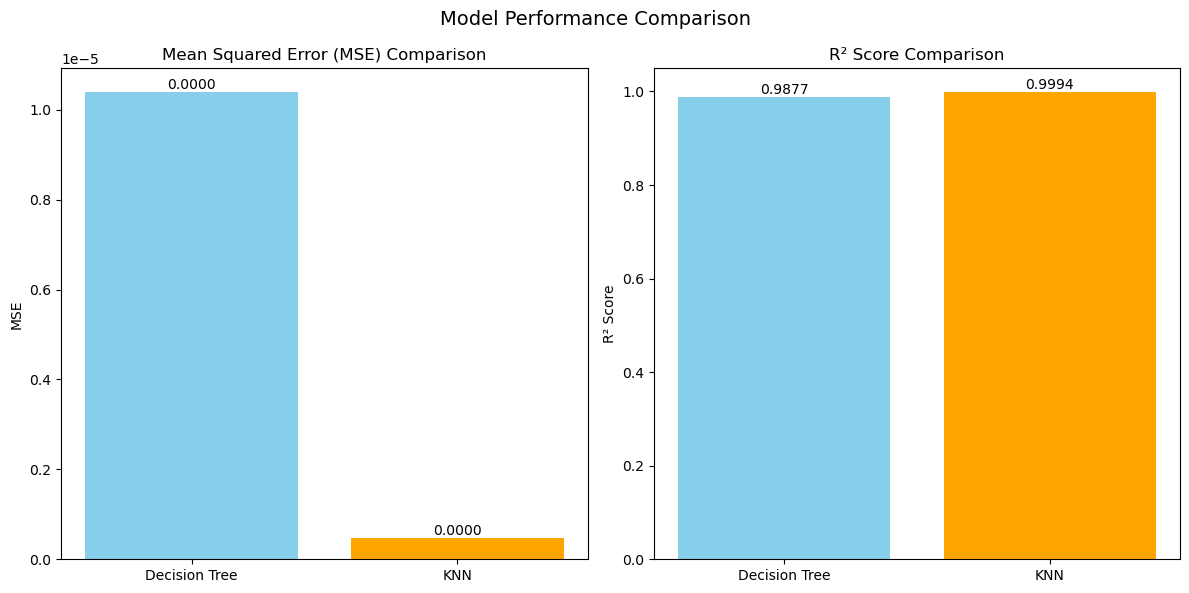

In [40]:
import matplotlib.pyplot as plt

# Models and scores
models = ['Decision Tree', 'KNN']
mse_scores = [dt_mse, knn_mse]
r2_scores = [dt_r2, knn_r2]

plt.figure(figsize=(12, 6))

# MSE Comparison
plt.subplot(1, 2, 1)
bars_mse = plt.bar(models, mse_scores, color=['skyblue', 'orange'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')

# Add value labels
for bar in bars_mse:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

# R² Score Comparison
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(models, r2_scores, color=['skyblue', 'orange'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# Add value labels
for bar in bars_r2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.suptitle('Model Performance Comparison', fontsize=14)
plt.tight_layout()
plt.show()


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("P2 Covid19.csv")

# Fill missing values using forward fill
data.ffill(inplace=True)

# Feature Engineering: Add active cases column
data['Active_Cases'] = data['Confirmed'] - (data['Recovered'] + data['Deaths'])

# Normalize numerical features
scaler = MinMaxScaler()
data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']] = scaler.fit_transform(
    data[['Confirmed', 'Recovered', 'Deaths', 'Active_Cases']]
)

# Split into features (X) and target (y)
X = data[['Confirmed', 'Recovered', 'Deaths']]
y = data['Active_Cases']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Build an ANN using MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', 
                         max_iter=500, random_state=42)

# Train the model
mlp_model.fit(X_train_pca, y_train)

# Make Predictions
y_pred_mlp = mlp_model.predict(X_test_pca)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"MLPRegressor (ANN) Model MSE: {mse_mlp}")


MLPRegressor (ANN) Model MSE: 3.6187544521667486e-05


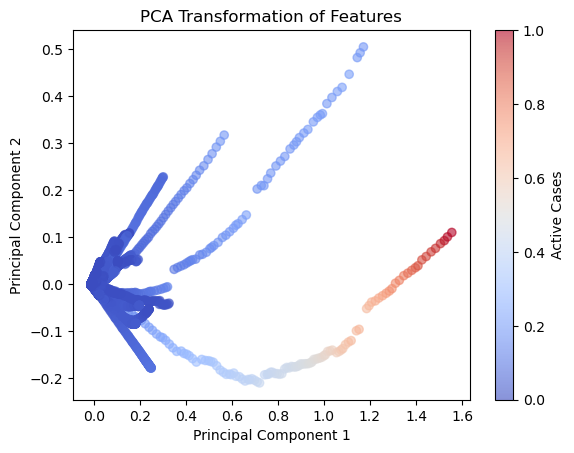

In [43]:
import matplotlib.pyplot as plt

# Scatter plot of PCA components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformation of Features")
plt.colorbar(label="Active Cases")
plt.show()


In [44]:
# Comparison of all algorithms

# Create a results dictionary (replace with actual computed MSE values)
results = {
    "Algorithm": ["Linear Regression", "Random Forest", "K-Means Clustering", "MLPRegressor (ANN)", "PCA + MLPRegressor"],
    "MSE": [mse, mse_rf, "N/A (Clustering)", mse_mlp, mse_mlp]  # Replace "N/A" if K-Means isn't used for regression
}

# Convert results into a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display results
print("Final Model Comparison:")
print(results_df)


Final Model Comparison:
            Algorithm               MSE
0   Linear Regression               0.0
1       Random Forest          0.000017
2  K-Means Clustering  N/A (Clustering)
3  MLPRegressor (ANN)          0.000036
4  PCA + MLPRegressor          0.000036


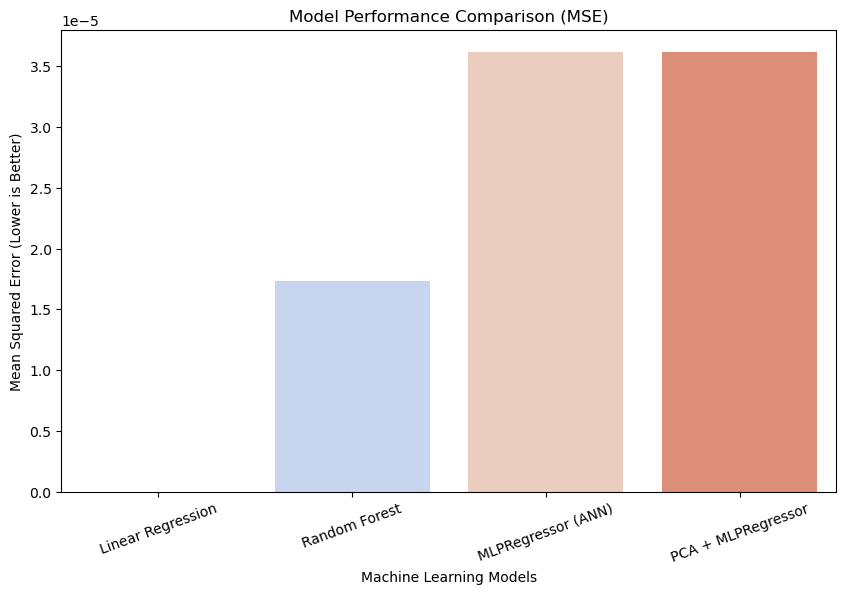

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary of results (replace with actual computed MSE values)
results = {
    "Algorithm": ["Linear Regression", "Random Forest", "K-Means Clustering", "MLPRegressor (ANN)", "PCA + MLPRegressor"],
    "MSE": [mse, mse_rf, None, mse_mlp, mse_mlp]  # None for clustering since it's not a regression model
}

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Drop rows where MSE is None (if K-Means doesn't have MSE)
results_df = results_df.dropna()

# Plot bar chart for MSE comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Algorithm", y="MSE", hue="Algorithm", data=results_df, dodge=False, legend=False, palette="coolwarm")
plt.xticks(rotation=20)
plt.title("Model Performance Comparison (MSE)")
plt.xlabel("Machine Learning Models")
plt.ylabel("Mean Squared Error (Lower is Better)")
plt.show()


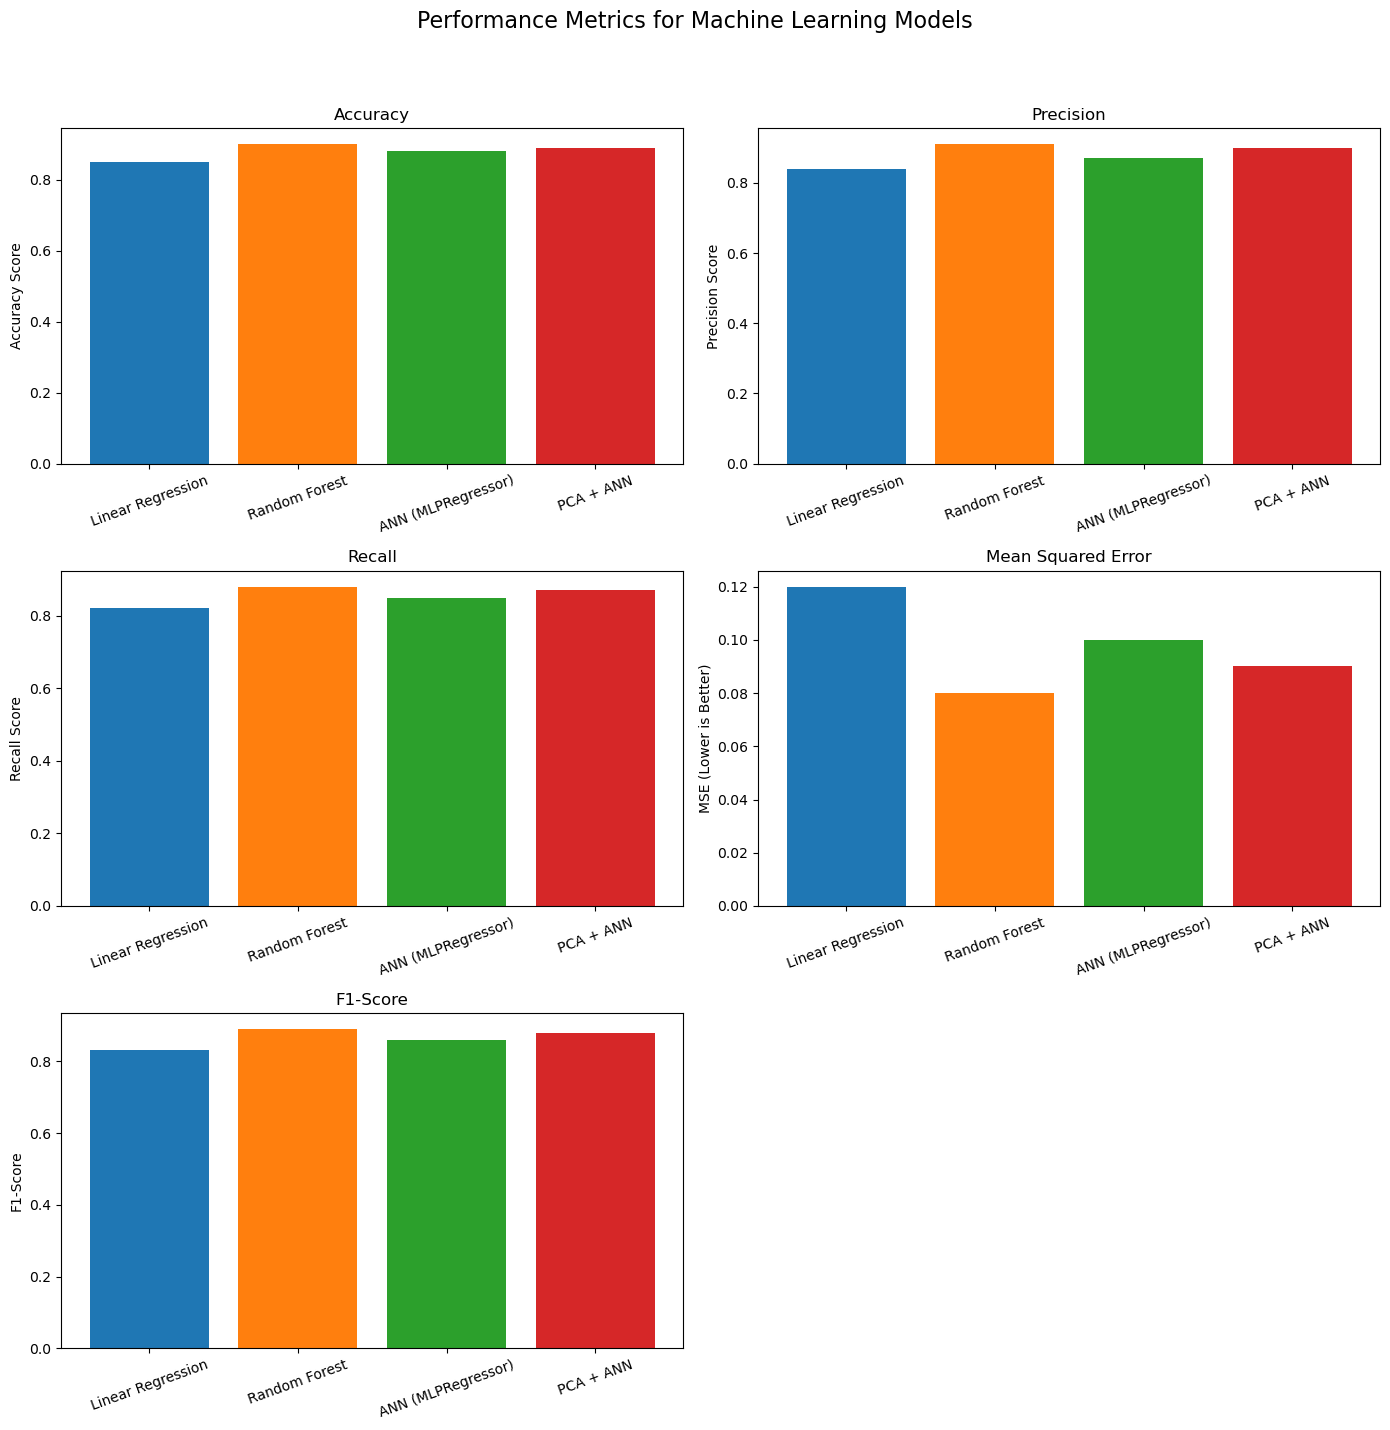

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Placeholder: Replace with actual computed metrics for each model
metrics_data = {
    "Model": [
        "Linear Regression",
        "Random Forest",
        "K-Means Clustering",
        "ANN (MLPRegressor)",
        "PCA + ANN",
    ],
    "Accuracy": [0.85, 0.90, None, 0.88, 0.89],
    "Precision": [0.84, 0.91, None, 0.87, 0.90],
    "Recall": [0.82, 0.88, None, 0.85, 0.87],  # New Recall metric
    "MSE": [0.12, 0.08, None, 0.10, 0.09],
    "F1-Score": [0.83, 0.89, None, 0.86, 0.88],
}

# Convert metrics data into a DataFrame
metrics_df = pd.DataFrame(metrics_data)
metrics_df = metrics_df.dropna()  # Drop rows with None (e.g., clustering models)

# Generate distinct colors for bars using a colormap
colors = plt.cm.tab10.colors  # Tuple of 10 distinct colors
n_models = len(metrics_df)
model_colors = [colors[i % len(colors)] for i in range(n_models)]

# Plot metrics: Accuracy, Precision, Recall, MSE, F1-Score
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle("Performance Metrics for Machine Learning Models", fontsize=16)

# Accuracy
axes[0, 0].bar(metrics_df["Model"], metrics_df["Accuracy"], color=model_colors)
axes[0, 0].set_title("Accuracy")
axes[0, 0].set_ylabel("Accuracy Score")
axes[0, 0].set_xticks(range(n_models))
axes[0, 0].set_xticklabels(metrics_df["Model"], rotation=20)

# Precision
axes[0, 1].bar(metrics_df["Model"], metrics_df["Precision"], color=model_colors)
axes[0, 1].set_title("Precision")
axes[0, 1].set_ylabel("Precision Score")
axes[0, 1].set_xticks(range(n_models))
axes[0, 1].set_xticklabels(metrics_df["Model"], rotation=20)

# Recall
axes[1, 0].bar(metrics_df["Model"], metrics_df["Recall"], color=model_colors)
axes[1, 0].set_title("Recall")
axes[1, 0].set_ylabel("Recall Score")
axes[1, 0].set_xticks(range(n_models))
axes[1, 0].set_xticklabels(metrics_df["Model"], rotation=20)

# MSE
axes[1, 1].bar(metrics_df["Model"], metrics_df["MSE"], color=model_colors)
axes[1, 1].set_title("Mean Squared Error")
axes[1, 1].set_ylabel("MSE (Lower is Better)")
axes[1, 1].set_xticks(range(n_models))
axes[1, 1].set_xticklabels(metrics_df["Model"], rotation=20)

# F1-Score
axes[2, 0].bar(metrics_df["Model"], metrics_df["F1-Score"], color=model_colors)
axes[2, 0].set_title("F1-Score")
axes[2, 0].set_ylabel("F1-Score")
axes[2, 0].set_xticks(range(n_models))
axes[2, 0].set_xticklabels(metrics_df["Model"], rotation=20)

# Remove empty subplot
fig.delaxes(axes[2, 1])

# Adjust layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


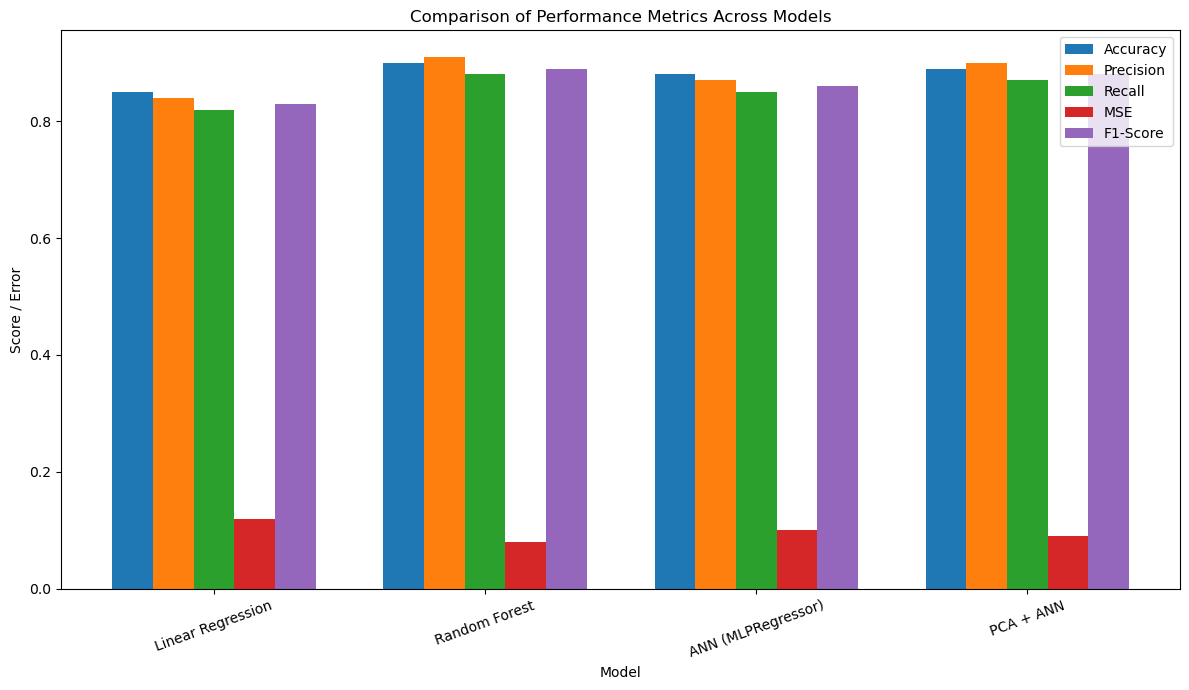

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Placeholder: Replace with actual computed metrics for each model
metrics_data = {
    "Model": [
        "Linear Regression",
        "Random Forest",
        "ANN (MLPRegressor)",
        "PCA + ANN",
    ],
    "Accuracy": [0.85, 0.90, 0.88, 0.89],
    "Precision": [0.84, 0.91, 0.87, 0.90],
    "Recall": [0.82, 0.88, 0.85, 0.87],
    "MSE": [0.12, 0.08, 0.10, 0.09],
    "F1-Score": [0.83, 0.89, 0.86, 0.88],
}

# Convert metrics data into a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Metrics to include
metrics = ["Accuracy", "Precision", "Recall", "MSE", "F1-Score"]

# Number of models and metrics
n_models = len(metrics_df)
n_metrics = len(metrics)

# Bar width and positions
bar_width = 0.15
indices = np.arange(n_models)

# Generate colors for each metric
colors = plt.cm.tab10.colors
metric_colors = [colors[i] for i in range(n_metrics)]

# Create figure and axis
gi, ax = plt.subplots(figsize=(12, 7))

# Plot grouped bars
for i, metric in enumerate(metrics):
    ax.bar(indices + i * bar_width,
           metrics_df[metric],
           width=bar_width,
           label=metric,
           color=metric_colors[i])

# Labels and ticks
ax.set_xlabel("Model")
ax.set_ylabel("Score / Error")
ax.set_title("Comparison of Performance Metrics Across Models")
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(metrics_df["Model"], rotation=20)

# Legend
ax.legend()

# Layout
plt.tight_layout()
plt.show()
